In [1]:
# The degree to which a subset of examples contains only a single class
# is known as purity
# any subset composed of only a single class is called pure.
# entropy - quantifies the randomness, or disorder, within a set of
# class values
# Sets with high entropy are very diverse 
# and provide little information about
# other items that may also belong in the set,
# as there is no apparent commonality. 
# The decision tree hopes to find splits that reduce entropy,
# ultimately increasing homogeneity within the groups.

$$Entropy(S)=\sum_{i=1}^{c}{-p_i\ log_2(pi)}$$

In [2]:
# c => number of class levels
# p_i => proportion of values falling into class level i.
# red = 60%, white = 40%:

In [3]:
-.6 * log2(.6) - .4 * log2(.4)

[1] 0.9709506

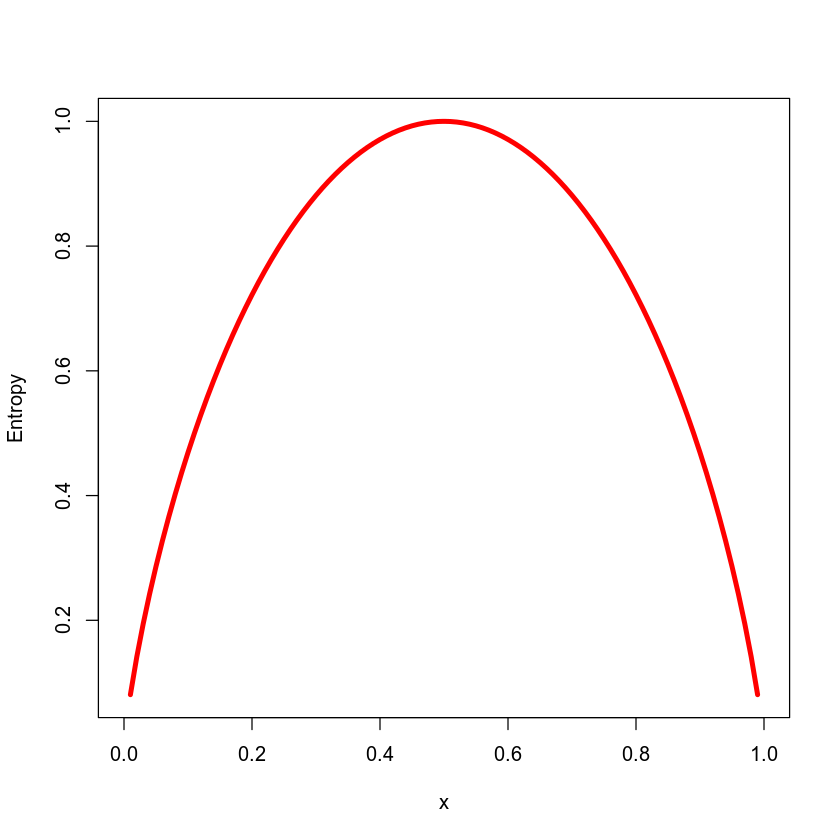

In [4]:
curve(-x * log2(x) - (1 - x) * log2(1 - x), col = 'red', xlab = 'x',
     ylab = 'Entropy', lwd = 4)

$$InfoGain(F) = Entropy(S_1)-Entropy(S_2)$$

$$Entropy(S)=\sum_{i=1}^{n}{w_i\ Entropy(P_i)}$$

In [5]:
## risky bank loans

In [6]:
credit = read.csv('../../R_projects//MLwR/Machine Learning with R (2nd Ed.)//Chapter 05/credit.csv')

In [7]:
str(credit)

'data.frame':	1000 obs. of  17 variables:
 $ checking_balance    : Factor w/ 4 levels "< 0 DM","> 200 DM",..: 1 3 4 1 1 4 4 3 4 3 ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : Factor w/ 5 levels "critical","good",..: 1 2 1 2 4 2 2 2 2 1 ...
 $ purpose             : Factor w/ 6 levels "business","car",..: 5 5 4 5 2 4 5 2 5 2 ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : Factor w/ 5 levels "< 100 DM","> 1000 DM",..: 5 1 1 1 1 5 4 1 2 1 ...
 $ employment_duration : Factor w/ 5 levels "< 1 year","> 7 years",..: 2 3 4 4 3 3 2 3 4 5 ...
 $ percent_of_income   : int  4 2 2 2 3 2 3 2 2 4 ...
 $ years_at_residence  : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ...
 $ other_credit        : Factor w/ 3 levels "bank","none",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ housing             : Factor w/ 3 levels "other","own",..: 2 2 2 1 1 1 2 3 2 2 ...
 $ exi

In [8]:
table(credit$checking_balance)


    < 0 DM   > 200 DM 1 - 200 DM    unknown 
       274         63        269        394 

In [9]:
table(credit$savings_balance)


     < 100 DM     > 1000 DM  100 - 500 DM 500 - 1000 DM       unknown 
          603            48           103            63           183 

In [10]:
summary(credit$months_loan_duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    12.0    18.0    20.9    24.0    72.0 

In [11]:
summary(credit$amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18424 

In [12]:
table(credit$default)


 no yes 
700 300 

In [13]:
train_sample = sample(1000,900)

In [14]:
str(train_sample)

 int [1:900] 368 590 362 874 880 205 610 388 394 666 ...


In [15]:
credit_train = credit[train_sample, ]
credit_test = credit[-train_sample, ]

In [16]:
prop.table(table(credit_train$default))
prop.table(table(credit_test$default))


       no       yes 
0.6944444 0.3055556 


  no  yes 
0.75 0.25 

In [17]:
library(C50)

In [18]:
## C5.0(train, class, trials, costs)

In [19]:
credit_model = C5.0(credit_train[-17], credit_train$default)

In [20]:
credit_model


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Tree size: 63 

Non-standard options: attempt to group attributes


In [21]:
summary(credit_model)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)


C5.0 [Release 2.07 GPL Edition]  	Fri Jun  2 15:36:51 2017
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

Decision tree:

checking_balance in {> 200 DM,unknown}: no (405/53)
checking_balance in {< 0 DM,1 - 200 DM}:
:...months_loan_duration > 22:
    :...savings_balance in {> 1000 DM,unknown}:
    :   :...checking_balance = < 0 DM:
    :   :   :...existing_loans_count <= 1: yes (13/3)
    :   :   :   existing_loans_count > 1: no (4)
    :   :   checking_balance = 1 - 200 DM:
    :   :   :...amount <= 9960: no (18)
    :   :       amount > 9960: yes (3/1)
    :   savings_balance in {< 100 DM,100 - 500 DM,500 - 1000 DM}:
    :   :...months_loan_duration > 47:
    :       :...years_at_residence <= 1: no (3/1)
    :       :   years_at_residence > 1: yes (31/2)
    :       months_loan_duration <= 47:
    :       :...percent_of_income <= 3:
    :

In [22]:
credit_pred = predict(credit_model, credit_test)

In [23]:
library(gmodels)

In [24]:
CrossTable(credit_test$default, credit_pred, prop.chisq = F, prop.c = F,
          prop.r = F, dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        67 |         8 |        75 | 
               |     0.670 |     0.080 |           | 
---------------|-----------|-----------|-----------|
           yes |        18 |         7 |        25 | 
               |     0.180 |     0.070 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        85 |        15 |       100 | 
---------------|-----------|-----------|-----------|

 


In [25]:
credit_boost10 = C5.0(credit_train[-17], credit_train$default,
                     trials = 10)

In [26]:
credit_boost10


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Number of boosting iterations: 10 
Average tree size: 52.6 

Non-standard options: attempt to group attributes


In [27]:
summary(credit_boost10)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Fri Jun  2 15:36:51 2017
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

checking_balance in {> 200 DM,unknown}: no (405/53)
checking_balance in {< 0 DM,1 - 200 DM}:
:...months_loan_duration > 22:
    :...savings_balance in {> 1000 DM,unknown}:
    :   :...checking_balance = < 0 DM:
    :   :   :...existing_loans_count <= 1: yes (13/3)
    :   :   :   existing_loans_count > 1: no (4)
    :   :   checking_balance = 1 - 200 DM:
    :   :   :...amount <= 9960: no (18)
    :   :       amount > 9960: yes (3/1)
    :   savings_balance in {< 100 DM,100 - 500 DM,500 - 1000 DM}:
    :   :...months_loan_duration > 47:
    :       :...years_at_residence <= 1: no (3/1)
    :       :   years_at_residence > 1: yes (31/2)
    :       months_loan_duration <= 47:
    :   

In [28]:
credit_boost_pred10 = predict(credit_boost10, credit_test)

In [29]:
CrossTable(credit_test$default, credit_boost_pred10, prop.chisq = F, 
           prop.c = F, prop.r = F, dnn = c('actual default', 
                                           'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        65 |        10 |        75 | 
               |     0.650 |     0.100 |           | 
---------------|-----------|-----------|-----------|
           yes |        16 |         9 |        25 | 
               |     0.160 |     0.090 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        81 |        19 |       100 | 
---------------|-----------|-----------|-----------|

 


In [30]:
## Making some mistakes more costly than others

In [31]:
matrix_dimensions = list(c('no', 'yes'), c('no', 'yes'))

In [32]:
names(matrix_dimensions) = c('predicted', 'actual')

In [33]:
matrix_dimensions

$predicted
[1] "no"  "yes"

$actual
[1] "no"  "yes"

In [34]:
error_cost = matrix(c(0, 1, 4, 0), nrow = 2, dimnames = matrix_dimensions)

In [35]:
error_cost

,no,yes
no,0,4
yes,1,0


In [36]:
credit_cost = C5.0(credit_train[-17], credit_train$default, 
                  costs = error_cost)

In [37]:
credit_cost_pred = predict(credit_cost, credit_test)

In [38]:
CrossTable(credit_test$default, credit_cost_pred, prop.chisq = F,
          prop.c = F, prop.r = F, dnn = c('actual default',
                                         'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        50 |        25 |        75 | 
               |     0.500 |     0.250 |           | 
---------------|-----------|-----------|-----------|
           yes |        10 |        15 |        25 | 
               |     0.100 |     0.150 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        60 |        40 |       100 | 
---------------|-----------|-----------|-----------|

 


# Rule Learners

In [39]:
# rule learners - apply them where features are primarily nominal
# good for rare events

In [40]:
mushrooms = read.csv('../../R_projects/MLwR/Machine Learning with R (2nd Ed.)//Chapter 05/mushrooms.csv',
                    stringsAsFactors = T)

In [41]:
str(mushrooms)

'data.frame':	8124 obs. of  23 variables:
 $ type                    : Factor w/ 2 levels "edible","poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap_shape               : Factor w/ 6 levels "bell","conical",..: 3 3 1 3 3 3 1 1 3 1 ...
 $ cap_surface             : Factor w/ 4 levels "fibrous","grooves",..: 4 4 4 3 4 3 4 3 3 4 ...
 $ cap_color               : Factor w/ 10 levels "brown","buff",..: 1 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "almond","anise",..: 8 1 2 8 7 1 1 2 8 1 ...
 $ gill_attachment         : Factor w/ 2 levels "attached","free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill_spacing            : Factor w/ 2 levels "close","crowded": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill_size               : Factor w/ 2 levels "broad","narrow": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill_color              : Factor w/ 12 levels "black","brown",..: 1 1 2 2 1 2 5 2 8 5 ...
 $ stalk_shape             : Factor w/

In [42]:
mushrooms$veil_type = NULL

In [43]:
table(mushrooms$type)


   edible poisonous 
     4208      3916 

In [44]:
library(RWeka)

In [45]:
## OneR(class ~ predictors, data)

In [46]:
mushroom_1R = OneR(type ~ ., data = mushrooms)

In [47]:
mushroom_1R

odor:
	almond	-> edible
	anise	-> edible
	creosote	-> poisonous
	fishy	-> poisonous
	foul	-> poisonous
	musty	-> poisonous
	none	-> edible
	pungent	-> poisonous
	spicy	-> poisonous
(8004/8124 instances correct)


In [48]:
summary(mushroom_1R)


=== Summary ===

Correctly Classified Instances        8004               98.5229 %
Incorrectly Classified Instances       120                1.4771 %
Kappa statistic                          0.9704
Mean absolute error                      0.0148
Root mean squared error                  0.1215
Relative absolute error                  2.958  %
Root relative squared error             24.323  %
Total Number of Instances             8124     

=== Confusion Matrix ===

    a    b   <-- classified as
 4208    0 |    a = edible
  120 3796 |    b = poisonous

In [49]:
## JRip(class ~ predictors, data)

In [50]:
mushroom_JRip = JRip(type ~ ., data = mushrooms)

In [51]:
mushroom_JRip

JRIP rules:

(odor = foul) => type=poisonous (2160.0/0.0)
(gill_size = narrow) and (gill_color = buff) => type=poisonous (1152.0/0.0)
(gill_size = narrow) and (odor = pungent) => type=poisonous (256.0/0.0)
(odor = creosote) => type=poisonous (192.0/0.0)
(spore_print_color = green) => type=poisonous (72.0/0.0)
(stalk_surface_below_ring = scaly) and (stalk_surface_above_ring = silky) => type=poisonous (68.0/0.0)
(habitat = leaves) and (cap_color = white) => type=poisonous (8.0/0.0)
(stalk_color_above_ring = yellow) => type=poisonous (8.0/0.0)
 => type=edible (4208.0/0.0)

Number of Rules : 9


In [52]:
mushroom_c5rules = C5.0(type ~ odor + gill_size, data=mushrooms,
                       rules = T)

In [53]:
summary(mushroom_c5rules)


Call:
C5.0.formula(formula = type ~ odor + gill_size, data = mushrooms, rules = T)


C5.0 [Release 2.07 GPL Edition]  	Fri Jun  2 15:36:53 2017
-------------------------------

Class specified by attribute `outcome'

Read 8124 cases (3 attributes) from undefined.data

Rules:

Rule 1: (4328/120, lift 1.9)
	odor in {almond, anise, none}
	->  class edible  [0.972]

Rule 2: (3796, lift 2.1)
	odor in {creosote, fishy, foul, musty, pungent, spicy}
	->  class poisonous  [1.000]

Default class: edible


Evaluation on training data (8124 cases):

	        Rules     
	  ----------------
	    No      Errors

	     2  120( 1.5%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	  4208          (a): class edible
	   120  3796    (b): class poisonous


	Attribute usage:

	100.00%	odor


Time: 0.0 secs
